In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
disaster_df = pd.read_csv('train.csv')

In [24]:
disaster_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/dazedtiara6667/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
disaster_df['text'][1]

['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada']

In [12]:
word_tokenize(disaster_df['text'][0])

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [13]:
from nltk.corpus import stopwords

In [14]:
stop_words = set(stopwords.words("english"))

In [17]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
disaster_df['text'] = disaster_df['text'].apply(text_process)

In [14]:
disaster_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [7]:
disaster_df['text_length'] = disaster_df['text'].apply(len)

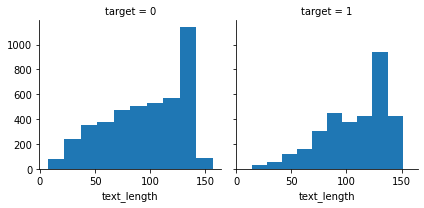

In [8]:
g = sns.FacetGrid(disaster_df,col='target')
g.map(plt.hist,'text_length')

In [24]:
disaster_df[['keyword','target']].corr()

,target
target,1.0


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=text_process)

In [20]:
import math

In [ ]:
def fillCatNoKeyword(data):
    if(math.isnan(data)):
        return "No keyword"
    return data

In [55]:
disaster_df['keyword'] = disaster_df['keyword'].fillna("No keywords")

In [36]:
disaster_df['keyword_and_tweets'] = disaster_df['keyword'] + disaster_df['text']

In [44]:
disaster_df['keyword']=vectorizer.fit_transform(disaster_df['keyword'])

In [45]:
disaster_df['keyword']

0         (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
1         (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
2         (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
3         (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
4         (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
                              ...                        
7608      (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
7609      (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
7610      (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
7611      (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
7612      (0, 169)\t1\n  (0, 157)\t1\n  (1, 169)\t1\n ...
Name: keyword, Length: 7613, dtype: object

In [26]:
X_text = vectorizer.fit_transform(disaster_df['text'])


In [27]:
X_text

<7613x26473 sparse matrix of type '<class 'numpy.int64'>'
	with 75006 stored elements in Compressed Sparse Row format>

In [56]:
X_keyword = vectorizer.fit_transform(disaster_df['keyword'])

In [28]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(disaster_df['text'],disaster_df['target'],random_state=101)

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [31]:
nb.fit(X_train,y_train)

MultinomialNB()

In [32]:
y_pred = nb.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.7841386554621849

In [41]:
test_df = pd.read_csv("test.csv")

In [103]:
X_tex = vectorizer.transform(test_df['text'])


In [129]:
df.to_csv('submission.csv')

In [134]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [114]:
tfidf = TfidfTransformer()
tfidf.fit(X_text)
X_tf = tfidf.transform(X_text)

In [115]:
X_tf

<7613x21637 sparse matrix of type '<class 'numpy.float64'>'
	with 111497 stored elements in Compressed Sparse Row format>

In [122]:
test_tf = tfidf.transform(X_tex)

In [142]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [68]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [69]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f0ef90a38b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [70]:
predictions = pipeline.predict(X_test)

In [71]:
accuracy_score(predictions,y_test)

0.7930672268907563

In [72]:
predict_test = pipeline.predict(test_df['text'])

In [73]:
submission = pd.DataFrame({'id':test_df['id'],'target':predict_test})

In [74]:
submission.to_csv("submissions.csv",index=False)